In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [2]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.0 MB/s eta 0:00:00


In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
excel_file_path = '/content/drive/MyDrive/HT1 - Redes neuronales/HEART.xlsx'


In [22]:
!pip install pandas


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la dimensión de entrada
input_dim = 14364

# Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(10, activation='relu', input_shape=(input_dim,)),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Datos de entreno
x_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100,))

# Parámetros de experimentación
neuron_counts = [2, 4, 8]
epochs = 10

results = []

for neurons in neuron_counts:

    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(10,)),
        Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=epochs, verbose=0)


    results.append((neurons, history.history['accuracy']))

for neurons, accuracy in results:
    print(f"Neuronas en capa oculta: {neurons}, Precisión: {accuracy[-1]}")


Neuronas en capa oculta: 2, Precisión: 0.5099999904632568
Neuronas en capa oculta: 4, Precisión: 0.550000011920929
Neuronas en capa oculta: 8, Precisión: 0.4399999976158142


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Datos de ejemplo
x_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100,))

# Parámetros de experimentación para minimizar capas y que estas no pasen de 10
max_hidden_layers = 7

for num_hidden_layers in range(1, max_hidden_layers + 1):

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(7,)))
    for _ in range(num_hidden_layers):
        model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida

    # Imprimir el número de capas ocultas del modelo actual
    print(f"Número de capas ocultas: {num_hidden_layers}")


Número de capas ocultas: 1
Número de capas ocultas: 2
Número de capas ocultas: 3
Número de capas ocultas: 4
Número de capas ocultas: 5
Número de capas ocultas: 6
Número de capas ocultas: 7


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

x_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100,))

# Parámetros de experimentación
min_neurons = 10
max_neurons = 1000
step_neurons = 50

for num_neurons in range(min_neurons, max_neurons + 1, step_neurons):

    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(10,)))  # Capa de entrada
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida

    # Imprimir la cantidad de neuronas
    print(f"Cantidad de neuronas: {num_neurons}")


Cantidad de neuronas: 10
Cantidad de neuronas: 60
Cantidad de neuronas: 110
Cantidad de neuronas: 160
Cantidad de neuronas: 210
Cantidad de neuronas: 260
Cantidad de neuronas: 310
Cantidad de neuronas: 360
Cantidad de neuronas: 410
Cantidad de neuronas: 460
Cantidad de neuronas: 510
Cantidad de neuronas: 560
Cantidad de neuronas: 610
Cantidad de neuronas: 660
Cantidad de neuronas: 710
Cantidad de neuronas: 760
Cantidad de neuronas: 810
Cantidad de neuronas: 860
Cantidad de neuronas: 910
Cantidad de neuronas: 960


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

x_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100,))

min_epochs = 10
max_epochs = 500
step_epochs = 100

for num_epochs in range(min_epochs, max_epochs + 1, step_epochs):

    model = Sequential()
    model.add(Dense(4, activation='relu', input_shape=(10,)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=num_epochs, verbose=0)

    print(f"Cantidad de épocas: {num_epochs}, Precisión: {history.history['accuracy'][-1]}")


Cantidad de épocas: 10, Precisión: 0.5099999904632568
Cantidad de épocas: 110, Precisión: 0.5899999737739563
Cantidad de épocas: 210, Precisión: 0.6200000047683716
Cantidad de épocas: 310, Precisión: 0.6499999761581421
Cantidad de épocas: 410, Precisión: 0.6399999856948853


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

x_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100,))

min_batch_size = 1
max_batch_size = len(x_train)
batch_size_multiplier = 2

current_batch_size = min_batch_size
while current_batch_size <= max_batch_size:

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(10,)))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo con el tamaño de batch actual
    history = model.fit(x_train, y_train, batch_size=current_batch_size, epochs=10, verbose=0)

    # Imprimir el tamaño de batch actual y la precisión final
    print(f"Tamaño de batch: {current_batch_size}, Precisión: {history.history['accuracy'][-1]}")

    current_batch_size *= batch_size_multiplier


Tamaño de batch: 1, Precisión: 0.6499999761581421
Tamaño de batch: 2, Precisión: 0.6600000262260437
Tamaño de batch: 4, Precisión: 0.6399999856948853
Tamaño de batch: 8, Precisión: 0.6100000143051147
Tamaño de batch: 16, Precisión: 0.5699999928474426
Tamaño de batch: 32, Precisión: 0.6200000047683716
Tamaño de batch: 64, Precisión: 0.6000000238418579


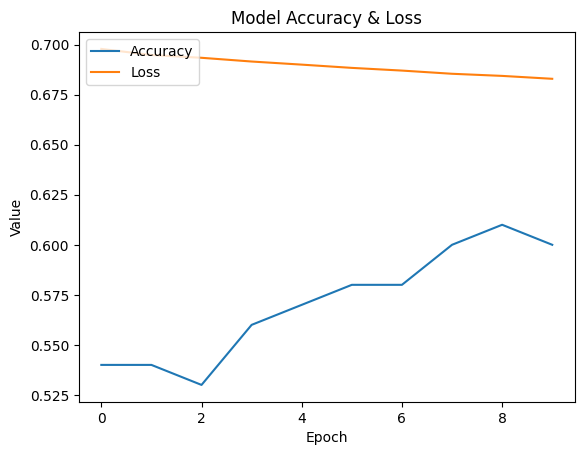

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy & Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()